In [1]:
from astropy.io import fits
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from HERA_calibration_sources import add_fluxes

In [2]:
files = np.sort(glob('/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/*.fits'))
HDUS = []
files = files
for f in files:
    HDUS.append(fits.open(f))

In [3]:
tb = add_fluxes(DEC_range=10.0, min_flux=5000.0)
tb

Number of objects found in a 10.0 degree band around the center of declination of the HERA FoV with a minimum apparent flux of 5.0 Jy: 21
              DEC                      Name     Peak flux          RA  \
11065  -29.480061  TGSSADR J002430.1-292848   9955.299805    6.125430   
62742  -30.891060  TGSSADR J020012.1-305327  16858.000000   30.050440   
73142  -30.630619  TGSSADR J022720.2-303750   4679.000000   36.834339   
151276 -30.122379  TGSSADR J045826.4-300720    911.900024   74.610413   
151307 -30.113991  TGSSADR J045514.2-300650   9501.200195   73.809464   
161630 -30.511909  TGSSADR J051330.6-303042   1145.199951   78.377602   
233226 -30.418230  TGSSADR J073819.7-302505   7336.100098  114.582474   
250979 -30.184980  TGSSADR J082126.4-301105   2536.199951  125.360031   
306740 -31.737730  TGSSADR J101809.2-314415  13791.000000  154.538345   
414236 -29.999001  TGSSADR J142529.1-295956  16865.800781  216.371628   
414254 -31.074530  TGSSADR J142155.5-310428   8898.400391  

,Name of Center,RA,DEC,Total flux
0,TGSSADR J002430.1-292848,6.125430,-29.480061,20084.700779
1,TGSSADR J020012.1-305327,30.050440,-30.891060,25311.699249
2,TGSSADR J022720.2-303750,36.834339,-30.630619,9238.400185
3,TGSSADR J045826.4-300720,74.610413,-30.122379,19984.100246
4,TGSSADR J045514.2-300650,73.809464,-30.113991,23645.400387
5,TGSSADR J051330.6-303042,78.377602,-30.511909,18364.499821
6,TGSSADR J073819.7-302505,114.582474,-30.418230,14347.499702
7,TGSSADR J082126.4-301105,125.360031,-30.184980,20358.700781
8,TGSSADR J101809.2-314415,154.538345,-31.737730,16862.600403
9,TGSSADR J142529.1-295956,216.371628,-29.999001,22982.300377


In [4]:
plot_data = {k: [] for k in tb['Name of Center']}
source_info = {v['Name of Center']: {'RA': v['RA'], 'DEC': v['DEC'], 
                                     'Total_Flux': v['Total flux']} 
                                     for _,v in tb.iterrows()}

In [5]:
err = 5

for HDU,f in zip(HDUS,files):
    print ('Processing: ', f)
    # Read in file information
    fits_info = HDU[0].header
    ax1        = fits_info['NAXIS1']
    ax2        = fits_info['NAXIS2']
    units      = fits_info['BUNIT']
    c_ra       = fits_info['OBSRA']
    c_dec      = fits_info['OBSDEC']
    pix_size   = fits_info['CDELT2']
    c_pix1     = fits_info['CRPIX1']
    c_pix2     = fits_info['CRPIX2']
    
    data = HDU[0].data
    data = np.flip(data[0][0],axis=0)
    
    w = WCS(f)
    
    l_bound = w.all_pix2world(0,c_pix2,0,0,0)[0]
    r_bound = w.all_pix2world(ax1,c_pix2,0,0,0)[0]
    
    if l_bound < r_bound:
        r_bound -= 360
    
    for _,src in tb.iterrows():
        # Convert a position to pixel values
        
        if l_bound-err*pix_size > src['RA'] > r_bound+err*pix_size:
            i,j = w.all_world2pix(src['RA'],src['DEC'],0,0,0)[:2]
            i = int(i)
            j = int(ax2-j)
            plot_data[src['Name of Center']].append(data[j-err:j+err,i-err:i+err].max()/src['Total flux'])

('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.12552.xx.HH.uvR.uvfits.msFinal.combined.img.fits')


indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.13298.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.14043.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.14789.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.15535.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.16280.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.17026.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.17772.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tco

('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.57291.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.58037.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.58783.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.59528.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.60274.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.61020.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.61765.xx.HH.uvR.uvfits.msFinal.combined.img.fits')
('Processing: ', '/home/tco

In [6]:
cleaned_set = {k: v for k,v in plot_data.iteritems() if len(v) == 15 }
len(cleaned_set)

6

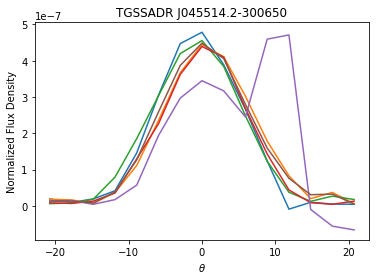

In [7]:
l = np.zeros(15)

for key,item in cleaned_set.items():
    theta = np.linspace(c_ra-l_bound,c_ra-r_bound,len(item))
    flux = np.array(item)
    plt.xlabel(r'$\theta$')
    plt.ylabel('Normalized Flux Density')
    plt.title(key)
    plt.plot(theta,flux,label=source_info[key]['DEC'])
    #plt.legend()
plt.show()

/data4/tcox/src/anaconda/envs/HERA/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


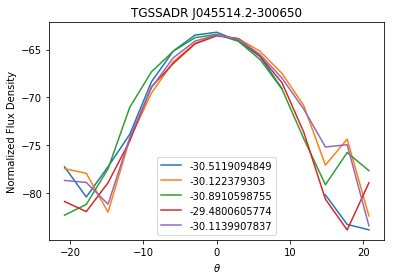

In [12]:
l = np.zeros(15)

#del cleaned_set['TGSSADR J022720.2-303750']

for key,item in cleaned_set.items():
    theta = np.linspace(c_ra-l_bound,c_ra-r_bound,len(item))
    flux = np.array(item)
    plt.xlabel(r'$\theta$')
    plt.ylabel('Normalized Flux Density')
    plt.title(key)
    plt.plot(theta,flux,label=source_info[key]['DEC'])
plt.legend()
plt.show()

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [15]:
ax = fig.gca(projection='3d')
ax.plot_trisurf(theta, , z, cmap=cm.jet, linewidth=0.1)

{'TGSSADR J002430.1-292848': [8.253629479657875e-09,
  6.472825998895542e-09,
  1.2927874994490282e-08,
  3.532928719567853e-08,
  1.2937806235916952e-07,
  2.2609797862313264e-07,
  3.620709672299858e-07,
  4.3917041596366986e-07,
  4.097843281649602e-07,
  2.681085557277866e-07,
  1.428164914973663e-07,
  4.368754494684217e-08,
  8.725987990008826e-09,
  4.173240279464798e-09,
  1.2908351880252289e-08],
 'TGSSADR J020012.1-305327': [5.946379208056246e-09,
  7.689948984858876e-09,
  1.8068912520191182e-08,
  7.912938003942951e-08,
  1.8533936822509207e-07,
  3.033423612745576e-07,
  4.195874767952706e-07,
  4.553484882994288e-07,
  3.8421008114666275e-07,
  2.478679983996307e-07,
  1.2266779276004765e-07,
  3.738957137740393e-08,
  1.2327373269531995e-08,
  2.6703279491844885e-08,
  1.730285247295008e-08],
 'TGSSADR J043300.3-295615': [5.1439099087378936e-08,
  2.0157149284666953e-08,
  4.3583033381779846e-08,
  6.51215468285285e-08,
  1.0713557446976581e-07,
  1.8768718545056082e-07,

In [22]:
import pandas as pd

source_info = pd.DataFrame.from_dict(source_info)
source_info[cleaned_set.keys()].loc['DEC']

TGSSADR J051330.6-303042   -30.511909
TGSSADR J045826.4-300720   -30.122379
TGSSADR J051342.7-302455   -30.415541
TGSSADR J043300.3-295615   -29.937559
TGSSADR J020012.1-305327   -30.891060
TGSSADR J002430.1-292848   -29.480061
TGSSADR J045514.2-300650   -30.113991
Name: DEC, dtype: float64

In [12]:
from pyuvdata import UVData

In [13]:
u = UVData()

In [55]:
u.read_miriad('/home/tcox/data/HERA_data/2458042/zen.2458042.12552.xx.HH.uv')

In [56]:
u.time_array.shape

(67680,)

In [71]:
from copy import deepcopy

n = int(len(u.time_array)/4)
n

16920

In [ ]:
def new_uvs(n):
    times = np.split(u.time_array,n)
    for time in times:
        v = deepcopy(u)
        v.select(time)
        

In [63]:
v.select(times=times[:])

In [66]:
v.time_array.shape

(33840,)

In [67]:
v.data_array.shape

(33840, 1, 1024, 1)